# Notebook to explain how to use Win Probability

We will first import the py_ball library, which contains the winprobability submodule
I added a constants submodule, which contains the headers.
The other two packages are just for evaluation of the model

In [9]:
%matplotlib inline
from py_ball import winprobability
import time
import statistics

## Win Probability Object
Now, we generate a win probability object, which contains methods that we can use to manipulate and plot the win probability data

It takes in the game_id for the stats.nba.com API and the headers (from the constants submodule)

In [10]:
headers = {'Connection': 'keep-alive',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'Referer': 'stats.nba.com',
           'x-nba-stats-origin': 'stats',
           'x-nba-stats-token': 'true',
           'Accept-Language': 'en-US,en;q=0.9',
           "X-NewRelic-ID": "VQECWF5UChAHUlNTBwgBVw==",
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)' +\
                         ' AppleWebKit/537.36 (KHTML, like Gecko)' + \
                         ' Chrome/81.0.4044.129 Safari/537.36'}

In [12]:
wp = winprobability.WinProbability(game_id="0021900004", headers=headers)

## Using the probabilities
The method we will use is the WinProbability.probs() method. It has multiple inputs:

plot_home=True, whether the model plots the home win probability throughout the game
plot_away=False, whether the model plots the away win probability throughout the game
plot_diff=False, whether or not to plot the point differential side by side with the win probability
get_values=False, whether to return 4 values in addition (or not) to making the plots. It will return (in the following order:

1) Timestamps
2) Home win probability every 3 second interval in the game
3) Away win probability every 3 second interval in the game
4) The home team abbreviation
5) The away team abbreviation

Below are some examples

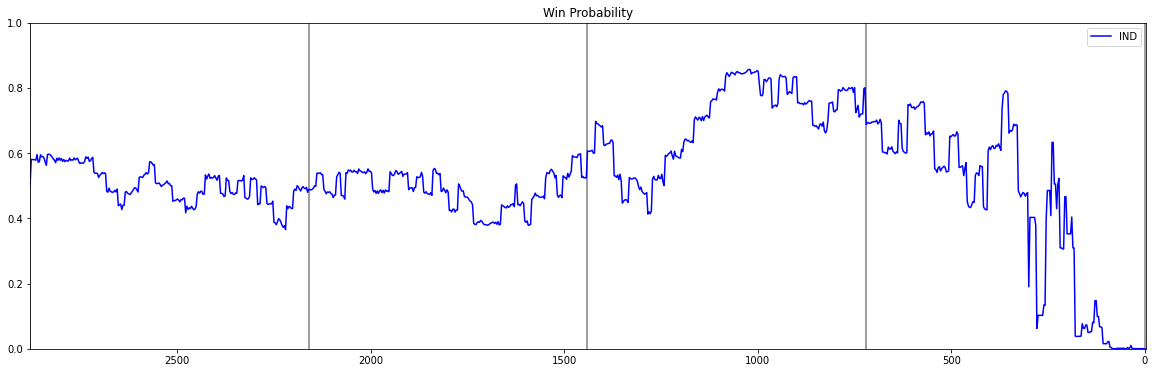

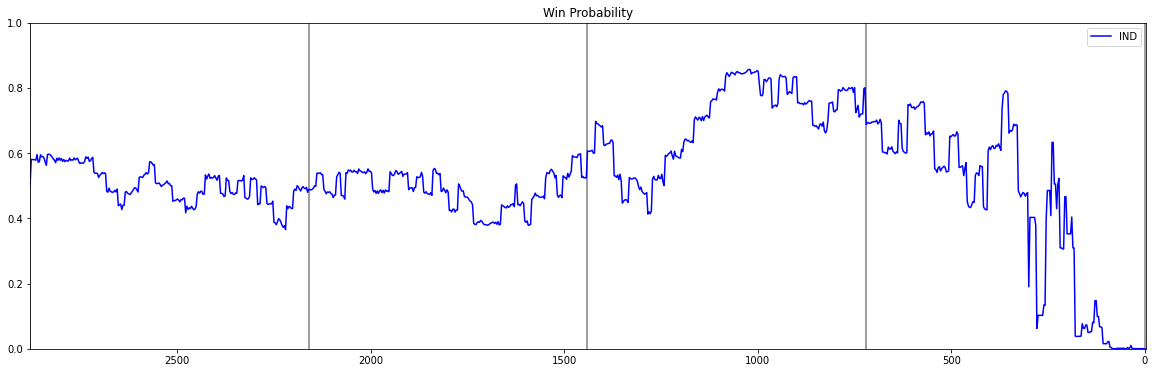

In [13]:
wp.probs()

In [4]:
wp.probs(plot_home=True, plot_away=True)

NameError: name 'wp' is not defined

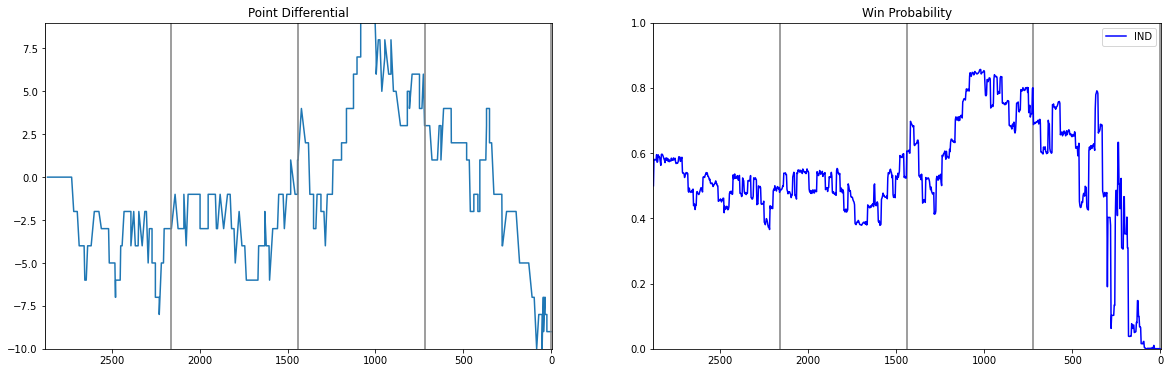

In [5]:
wp.probs(plot_diff=True)

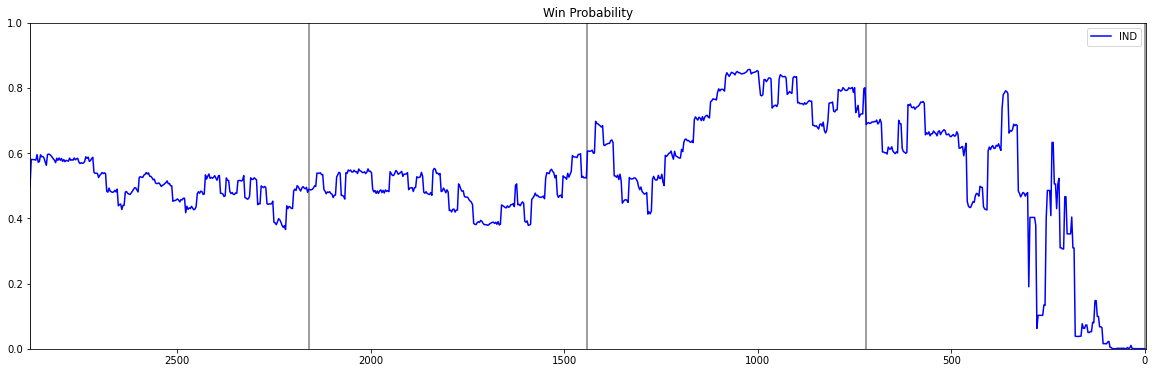

In [6]:
times, home_p, away_p, home_abr, away_abr = wp.probs(plot_home=True, get_values=True)

In [7]:
times[0], home_p[0], away_p[0]

(2880, 0.5, 0.5)

## Model Accuracy
To evaluate model accuracy, we implement a brier score which is essentially the summation of all of the square differences between the actual and predicted probability. You can read more about brier scores here https://en.wikipedia.org/wiki/Brier_score

You can easily check the brier score for an individual game like so:

In [8]:
wp.brier_score()

0.31326828346144503

## Evaluate for the 2018-19 Season

Here, we get all the game ids for the 2018-19 regular season and get the brier score for each game.

In [40]:
"""
Given the total number of games in a season, we generate the game_ids
"""
def get_game_ids(years, total_games_per_year=1230):
    game_ids = []
    for year in years:
        for game in range(1, total_games_per_year+1):
            maybe = '002%s' + str(game).zfill(5)
            game_ids.append(maybe % year)
    return game_ids

In [42]:
gids = get_game_ids(["18"])

In [44]:
scores = []

In [ ]:
for index, game_id in enumerate(gids):
    wp = winprobability.WinProbability(game_id=game_id, headers=constants.headers)
    brier_score = wp.brier_score()
    scores.append(brier_score)
    time.sleep(3.0)

In [49]:
len(scores)

1230

## Final Score
The final score we get is 0.167 for the 2017-18 season.

In [9]:
statistics.mean(scores)

NameError: name 'scores' is not defined